In [ ]:
import numpy as np
import sklearn 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import importlib 
import graphviz
import pandas as pd
import matplotlib.pyplot as plt
from DecisionTreeClassifier import DecisionTreeClassifier

In [ ]:
importlib.reload(DecisionTreeClassifier)

## Test on credit:

In [ ]:
dt = DecisionTreeClassifier.DecisionTree()
credit = np.loadtxt('res/credit.txt', delimiter=',', skiprows=1)
print(credit.shape)

dt_credit = DecisionTreeClassifier.DecisionTree()
dt_credit.tree_grow(credit[:, :-1], credit[:, -1], nmin=1, minleaf=1, nfeat=None)
dt_credit.print_tree()
fig = plt.figure(figsize=(25,20))
dt_credit.plot_tree(max_depth=1)

y_pred = dt_credit.tree_predict(credit[:, :-1])
y_true = credit[:,-1]
confusion_matrix(y_true, y_pred)

# PIMA Indians Dataset

In [ ]:
pima = np.loadtxt('res/pima.txt', delimiter=',', skiprows=1)

dt_pima = DecisionTreeClassifier.DecisionTree()
np.random.shuffle(pima)
dt_pima.tree_grow(pima[:, :-1], pima[:, -1], nmin=20, minleaf=5, nfeat=None)
#dt_pima.print_tree()
#dt_pima.plot_tree()

y_pred = dt_pima.tree_predict(pima[:, :-1])
y_true = pima[:,-1]

confusion_matrix(y_true, y_pred)

## Promise data:

In [ ]:
microsoft_metrics = {
"FOUT": "Number of method calls (fan out)" ,
"MLOC": "Method lines of code",
"NBD" : "Nested block depth",
"PAR":  "Number of parameters",
"VG": "McCabe cyclomatic complexity",
"NOF": "Number of fields",
"NOM": "Number of methods",
"NSF": "Number of static fields",
"NSM": "Number of static methods",
"ACD": "Number of anonymous type declarations", 
"NOI": "Number of interfaces ",
"NOT": "Number of classes ",
"TLOC": "Total lines of code",
"NOCU": "Number of files",
} 

In [ ]:
bug_predict_train = pd.read_csv('res/eclipse-metrics-packages-2.0.csv', delimiter=';')
bug_predict_test = pd.read_csv('res/eclipse-metrics-packages-3.0.csv', delimiter=';')

bug_predict_train.head()
#np.loadtxt('res/eclipse-metrics-packages-2.0.csv', delimiter=';', skiprows=1)

In [ ]:
microsoft_metrics.keys()
predictive_variables = []
for feature in bug_predict_train.columns:
    for microsoft_metric in microsoft_metrics.keys():
        if microsoft_metric in feature:
            predictive_variables.append(feature)
predictive_variables.append("pre")

x_train = bug_predict_train[predictive_variables].to_numpy()
print(x_train.shape)
y_train = np.where(bug_predict_train["post"].to_numpy() > 0,1, 0)
print(y_train.shape)
x_test = bug_predict_test[predictive_variables].to_numpy() 
print(x_test.shape)
y_test = np.where(bug_predict_test["post"].to_numpy() > 0,1, 0)
print(y_test.shape)

In [ ]:
dt_bagging = DecisionTreeClassifier.RandomForest()
dt_bagging.tree_grow_b(x_train, y_train, nmin=15, minleaf=5, nfeat=41, m = 100)
dt_random_forest = DecisionTreeClassifier.RandomForest()
dt_random_forest.tree_grow_b(x_train, y_train, nmin=15, minleaf=5, nfeat=6, m = 100)


/home/robin/anaconda3/envs/uu_courses/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/robin/anaconda3/envs/uu_courses/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
dt_normal = DecisionTreeClassifier.DecisionTree()
dt_normal.tree_grow(x_train, y_train, nmin=15, minleaf=5, nfeat=41)


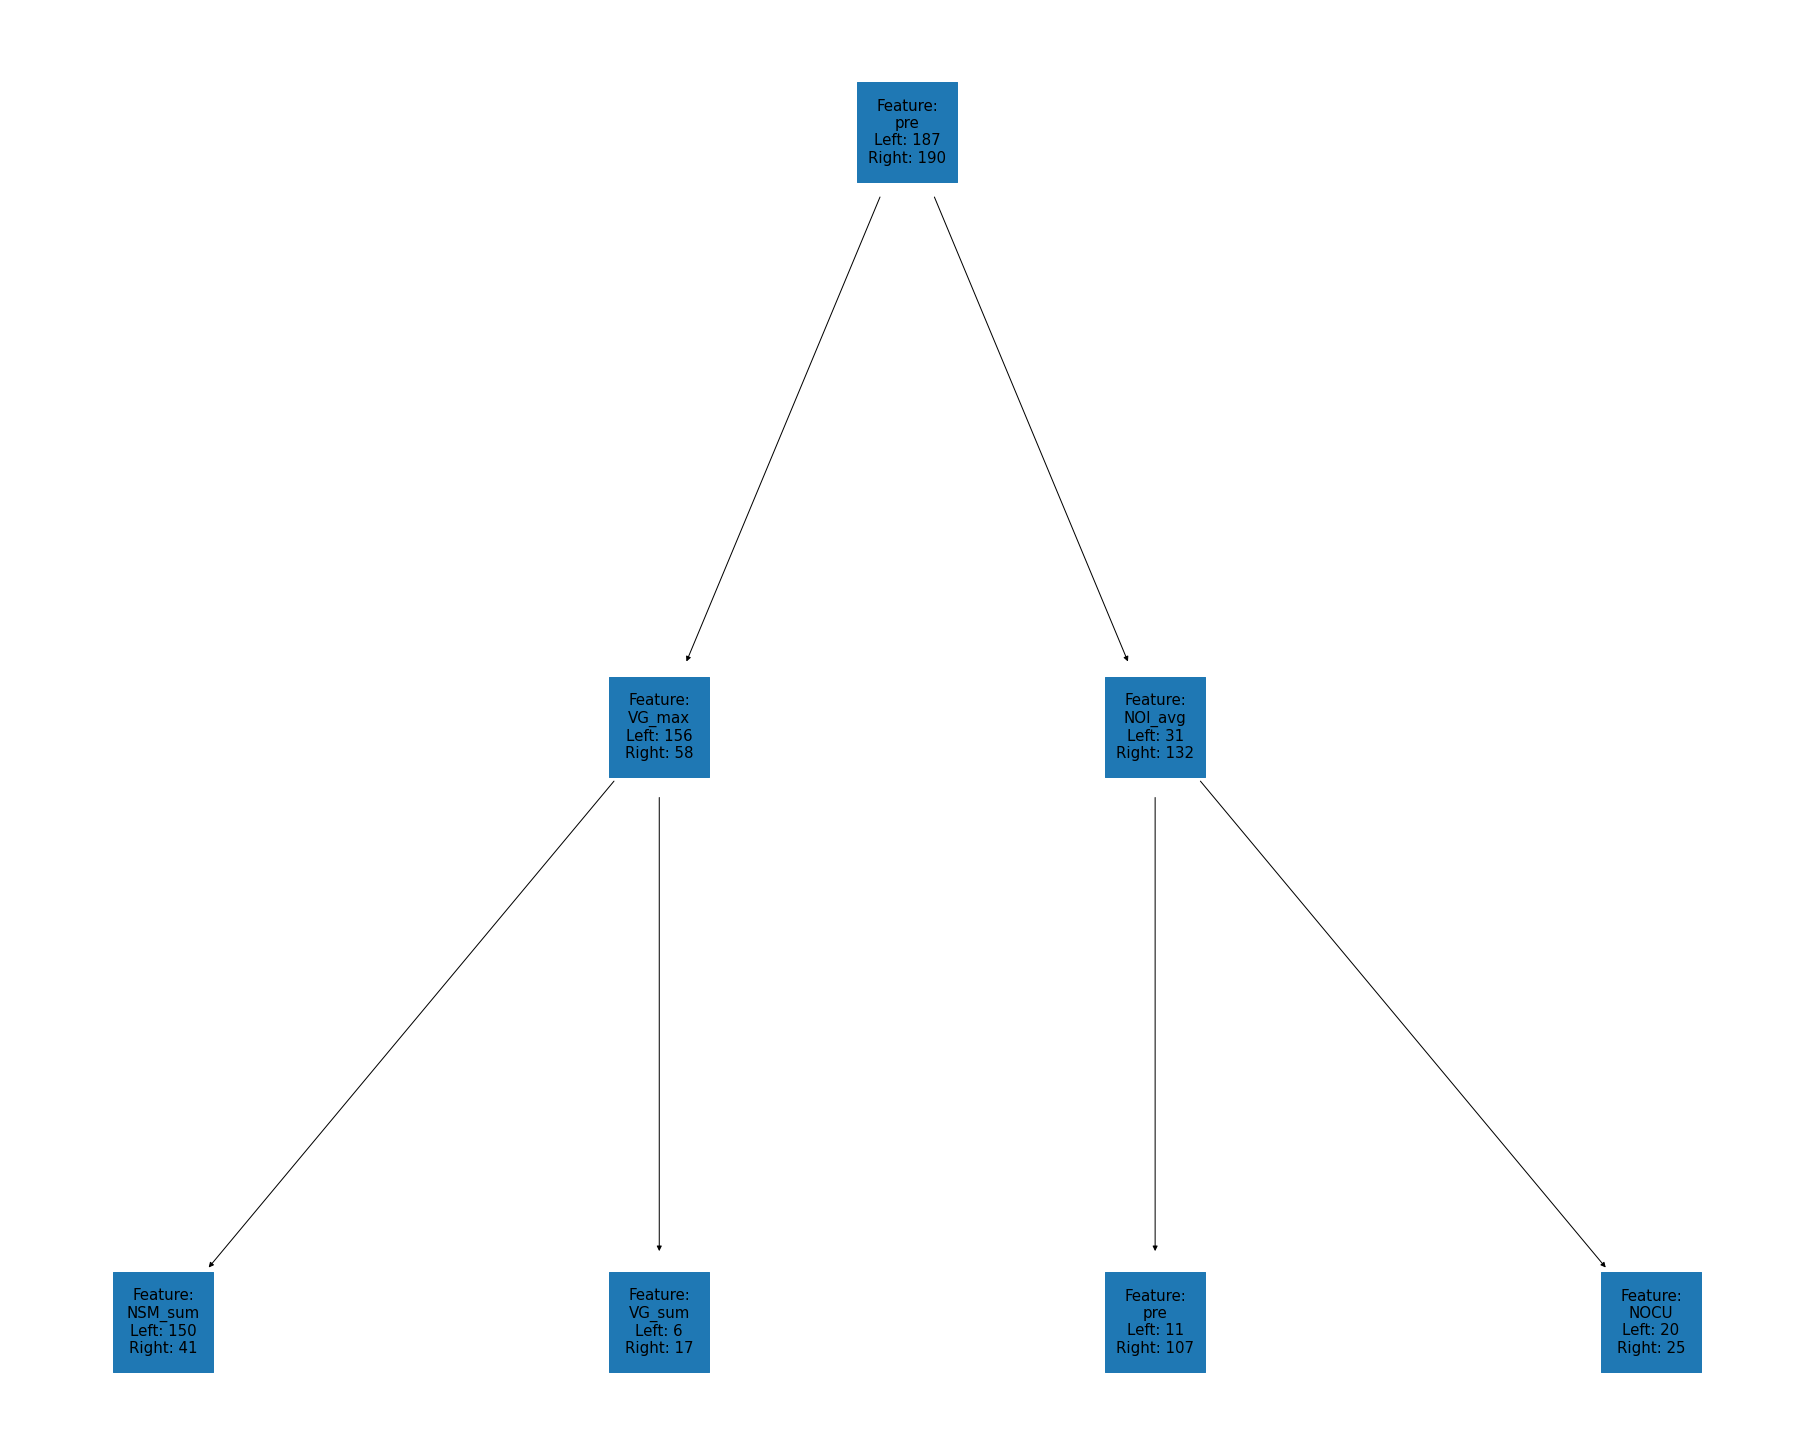

In [29]:
fig = plt.figure(figsize=(25,20))
dt_normal.plot_tree(max_depth=2, feature_names={i:feature for i, feature in enumerate(predictive_variables)})


In [112]:
y_pred = dt_normal.tree_predict(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

y_pred_1 = dt_bagging.tree_pred_b(x_test)
print(confusion_matrix(y_test, y_pred_1))
print("Accuracy: ", accuracy_score(y_test, y_pred_1))
print("Precision: ", precision_score(y_test, y_pred_1))
print("Recall: ", recall_score(y_test, y_pred_1))

y_pred_2 = dt_random_forest.tree_pred_b(x_test)
print(confusion_matrix(y_test, y_pred_2))
print("Accuracy: ", accuracy_score(y_test, y_pred_2))
print("Precision: ", precision_score(y_test, y_pred_2))
print("Recall: ", recall_score(y_test, y_pred_2))

[[256  92]
 [ 92 221]]
Accuracy:  0.7216338880484114
Precision:  0.7060702875399361
Recall:  0.7060702875399361
[[304  44]
 [ 96 217]]
Accuracy:  0.7881996974281392
Precision:  0.8314176245210728
Recall:  0.6932907348242812
[[277  71]
 [ 91 222]]
Accuracy:  0.7549167927382754
Precision:  0.757679180887372
Recall:  0.7092651757188498


In [111]:


def calculate_mcnemar_test(pred1, pred2):
    """
    Calculate the McNemar test for two sets of predictions.

    Parameters:
    pred1 (array-like): First set of predictions.
    pred2 (array-like): Second set of predictions.

    Returns:
    result: The result of the McNemar test.
    """
    # Create a contingency table
    table = [[0, 0], [0, 0]]
    for p1, p2 in zip(pred1, pred2):
        if p1 == p2:
            if p1 == 1:
                table[1][1] += 1
            else:
                table[0][0] += 1
        else:
            if p1 == 1:
                table[1][0] += 1
            else:
                table[0][1] += 1
    #return (table[1][0] - table[0][1]) ** 2 / (table[1][0] + table[0][1])
    # Perform the McNemar test
    result = mcnemar(table, exact=True)
    return result
print(calculate_mcnemar_test(y_pred, y_pred_2))

pvalue      0.05191052214883844
statistic   38.0


521

In [116]:
from scipy.stats import chi2
import math
from scipy.stats import chi2_contingency



def mcnemar_test_models(preds1, preds2, y):
    # Generate predictions for both models
    
    # Calculate discordant pairs
    
    a = sum((preds1 == y) & (preds2 == y))  # Both models classify correctly
    b = sum((preds1 == y) & (preds2 != y))  # Model 1 misclassifies, model 2 classifies correctly
    c = sum((preds1 != y) & (preds2 == y))  # Model 1 classifies correctly, model 2 misclassifies
    d = sum((preds1 != y) & (preds2 != y))  # Both models misclassify
    
    
   # contingency_table = [[0, a - d],
    #                     [c - b, 0]]
    m = [[0, b], [c, 0]]
    print(m)
    print(chi2_contingency(m))
    print((c - b) ** 2 / (c + b))
    #p = 2 * binom.cdf(abs(c + b), c + b)
    print(mcnemar(m))
    #print(b)
    #print(c)
    # Calculate McNemar's chi-square statistic
    return None
   # return math.sqrt(chi2_stat), p_value

print(mcnemar_test_models(y_pred_2, y_pred_1, y_test))

[[0, 21], [43, 0]]
Chi2ContingencyResult(statistic=59.54438079540451, pvalue=1.1956705801617569e-14, dof=1, expected_freq=array([[14.109375,  6.890625],
       [28.890625, 14.109375]]))
7.5625
pvalue      0.008146902228698568
statistic   21.0
None
